# Анализ LTV по клиенту

Есть два датасета: датасет с установками и датасет с платежами. Историческая глубина по регистрациям и по платежам чуть более двух месяцев. На основе этих данных требуется:
<br>1.Оценить общий LTV по клиенту в рамках данного проекта на текущий момент. Нужно подсчитать , что LTV за период накоплений платежей наблюдаемых был такой-то. История только на 2 месяца, получается LTV можно вычислить на 60 день
<br>2.Так как история всего 60 дней, а нам нужно понять какой LTV будет на 180 день, нужно спрогнозировать общий LTV по клиенту на 180 день, нужно прикинуть, каким образом эти платежи будут накапливаться далее.
<br>3.Посмотреть источники трафика + страны и попробовать построить LTV (пункт 1 и пункт 2, то есть оценка и прогноз на 180 день) по самым крупным источникам трафика отдельно, выбрать 3 источника + страну. Пример:
<br>a. Страна - DE, источник - ORGANIC
<br>b. Страна - BR, источник - Facebook Ads
<br>c. Страна - US, источник - googleadwords_int
<br>После сделать личные выводы. Решение может быть и в Jupyter Notebook, желательно если будете добавлять комментарии, что и где вы пытались сделать.
<br>После Notebook опубликовать у себя в гите, расшарить доступ и отправить ссылку.

***LTV, или lifetime value*** — метрика, которая показывает, сколько денег принесёт клиент за всё время взаимодействия с компанией: от первой покупки до последней (доход/ количество "платящих" пользователей). 
<br>***ARPU*** - доход/ количество пользователей.
<br>LTV = Lifetime*ARPU
<br>Lifetime- количество дней от первого визита до текущего дня.
<br>ARPU-[доход / количество пользователей].

Исследованы данные: тип данных и стат.величины, заменен регистр в названии столбцов таблиц, период данных с 2021-04-01 по 2021-06-08.

In [1]:
# Загрузка библиотек
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Путь к файлам
users=pd.read_csv('users_for_test_task_no_archive.csv')
pays=pd.read_csv('pays_for_test_task_no_archive.csv')        

In [3]:
# Замена названий всех столбцов df на нижний регистр
users.columns = users.columns.str.lower() 
pays.columns = pays.columns.str.lower() 

In [4]:
# Чтение файлов_Историческая глубина по регистрациям и платежам
users.head()

,user_id,reg_date_datetime,source,country,platform,reg_date,organic,coh
0,-4973778100598221234,2021-04-17,Facebook Ads,IQ,ANDROID,1618617600,0,52
1,5812258986717022745,2021-04-16,googleadwords_int,DE,ANDROID,1618531200,0,53
2,3641231461578038700,2021-05-29,Facebook Ads,US,ANDROID,1622246400,0,10
3,7717637744784409954,2021-04-11,ORGANIC,IN,ANDROID,1618099200,1,58
4,1461469123719645680,2021-05-08,Facebook Ads,PH,ANDROID,1620432000,0,31


In [5]:
# Просмотр основных статистических данных
users['coh'].describe().astype('int')

count    177071
mean         38
std          20
min           0
25%          18
50%          47
75%          57
max          68
Name: coh, dtype: int64

In [6]:
# Проверка типов данных
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177071 entries, 0 to 177070
Data columns (total 8 columns):
user_id              177071 non-null int64
reg_date_datetime    177071 non-null object
source               177071 non-null object
country              175786 non-null object
platform             177071 non-null object
reg_date             177071 non-null int64
organic              177071 non-null int64
coh                  177071 non-null int64
dtypes: int64(4), object(4)
memory usage: 10.8+ MB


In [7]:
pays.head()

,user_id,pay_date_datetime,pay_amount,pay_date
0,3641231461578038700,2021-05-29,9.99,1622246400
1,3641231461578038700,2021-05-30,11.96,1622332800
2,3641231461578038700,2021-06-01,29.95,1622505600
3,-6436358564819894849,2021-05-21,2.60,1621555200
4,-6436358564819894849,2021-05-28,5.22,1622160000


In [8]:
# Проверка типов данных
pays.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5339 entries, 0 to 5338
Data columns (total 4 columns):
user_id              5339 non-null int64
pay_date_datetime    5339 non-null object
pay_amount           5339 non-null float64
pay_date             5339 non-null int64
dtypes: float64(1), int64(2), object(1)
memory usage: 167.0+ KB


In [9]:
# Просмотр основных статистических данных_'pay_amount': 17-812
pays['pay_amount'].describe().astype('int')

count    5339
mean       17
std        34
min         0
25%         2
50%         8
75%        16
max       812
Name: pay_amount, dtype: int64

In [10]:
# Период данных (2 месяца)
print(pays['pay_date_datetime'].min())
print(pays['pay_date_datetime'].max())

2021-04-01
2021-06-08


In [11]:
# Признак 'pay_date_datetime'_69 дат
set(pays['pay_date_datetime'])

{'2021-04-01',
 '2021-04-02',
 '2021-04-03',
 '2021-04-04',
 '2021-04-05',
 '2021-04-06',
 '2021-04-07',
 '2021-04-08',
 '2021-04-09',
 '2021-04-10',
 '2021-04-11',
 '2021-04-12',
 '2021-04-13',
 '2021-04-14',
 '2021-04-15',
 '2021-04-16',
 '2021-04-17',
 '2021-04-18',
 '2021-04-19',
 '2021-04-20',
 '2021-04-21',
 '2021-04-22',
 '2021-04-23',
 '2021-04-24',
 '2021-04-25',
 '2021-04-26',
 '2021-04-27',
 '2021-04-28',
 '2021-04-29',
 '2021-04-30',
 '2021-05-01',
 '2021-05-02',
 '2021-05-03',
 '2021-05-04',
 '2021-05-05',
 '2021-05-06',
 '2021-05-07',
 '2021-05-08',
 '2021-05-09',
 '2021-05-10',
 '2021-05-11',
 '2021-05-12',
 '2021-05-13',
 '2021-05-14',
 '2021-05-15',
 '2021-05-16',
 '2021-05-17',
 '2021-05-18',
 '2021-05-19',
 '2021-05-20',
 '2021-05-21',
 '2021-05-22',
 '2021-05-23',
 '2021-05-24',
 '2021-05-25',
 '2021-05-26',
 '2021-05-27',
 '2021-05-28',
 '2021-05-29',
 '2021-05-30',
 '2021-05-31',
 '2021-06-01',
 '2021-06-02',
 '2021-06-03',
 '2021-06-04',
 '2021-06-05',
 '2021-06-

1.Оценить общий LTV по клиенту в рамках данного проекта на текущий момент. Нужно подсчитать , что LTV за период накоплений платежей наблюдаемых был такой-то. История только на 2 месяца, получается LTV можно вычислить на 60 день

In [12]:
# Сводная таблица платежей
pays.pivot_table(index='pay_date_datetime', values='pay_amount', aggfunc='sum', 
                 margins=True).sort_values(by='pay_date_datetime', ascending=True).head(70)

,pay_amount
pay_date_datetime,
2021-04-01,318.02
2021-04-02,212.63
2021-04-03,309.39
2021-04-04,378.08
2021-04-05,435.11
...,...
2021-06-05,2369.66
2021-06-06,1608.70
2021-06-07,1879.59


Text(0, 0.5, 'Сумма платежа')

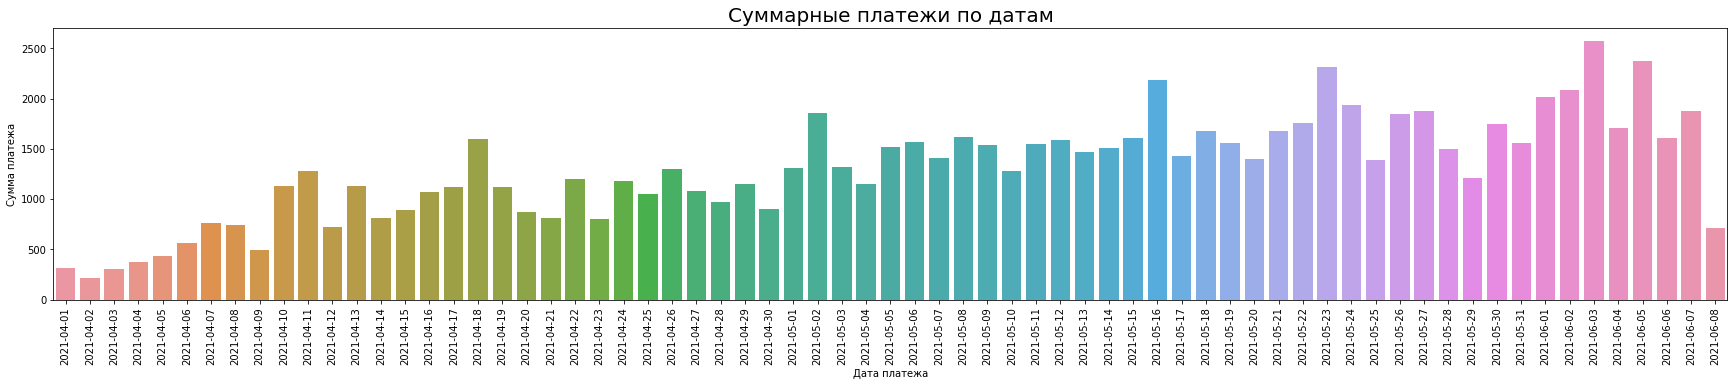

In [13]:
# Гистограмма платежей по датам_с 2021-04-01 по 2021-06-08
data = pays.pivot_table(index='pay_date_datetime', values='pay_amount', aggfunc='sum').sort_values(by='pay_date_datetime', ascending=True).head(70)
plt.figure(figsize=(30,5))
sns.barplot(x=data.index,y=data['pay_amount'])
plt.title('Суммарные платежи по датам', fontsize=20)
plt.xticks(rotation=90)
plt.xlabel("Дата платежа")
plt.ylabel("Сумма платежа")

In [14]:
# Количество платежей по 'user_id'
pays['user_id'].value_counts().head(3)

 8965414445419478069    44
 3104300642945644791    42
-198167270654132492     41
Name: user_id, dtype: int64

In [15]:
# Количество клиентов
client_count = len(pd.unique(pays['user_id']))
client_count

1915

In [16]:
# Цикл для установления факта платил/ не платил клиент, добавлен столбец 'pay_tipe'

def pay_tipe(row):
    pay = row['pay_amount']
    if pay == 0:
        return 0
    return 1
pays['pay_tipe'] = pays.apply(pay_tipe, axis = 1)

In [17]:
set(pays['pay_tipe'])

{0, 1}

In [18]:
pays.sample(3)

,user_id,pay_date_datetime,pay_amount,pay_date,pay_tipe
2246,5130909305013445749,2021-05-07,4.87,1620345600,1
1789,-563833515922819967,2021-06-07,8.96,1623024000,1
4098,1906971420254426757,2021-05-11,12.78,1620691200,1


In [19]:
# Выбор неплатящих 'user_id'_статус 0, но платили в другие даты
pay_no = pays[pays['pay_tipe'] == 0]
pay_no

,user_id,pay_date_datetime,pay_amount,pay_date,pay_tipe
225,867024081388679409,2021-04-27,0.0,1619481600,0
390,499876759404346306,2021-04-10,0.0,1618012800,0
748,2233585453658945915,2021-04-22,0.0,1619049600,0
1664,-9210094775089823772,2021-04-26,0.0,1619395200,0
4751,6573438836955998236,2021-05-01,0.0,1619827200,0


In [20]:
# Сумма платежей от клиентов за период_69 дней
pay_sum = pays['pay_amount'].sum()
pay_sum

90779.78

In [21]:
# Расчет LTV
LTV= pay_sum / client_count
LTV

47.404584856396866

##### Вывод:
Выведнена динамика и суммма платежей за анализируемый период. Просчитан LTV в целом (сумму платежей за период делим на количество клиентов) за 60 дней.  В среднем каждый клиент приносит 47.40 y.e.

##### 2, 3 пункты.

Text(0.5, 1.0, 'Трафик по источникам')

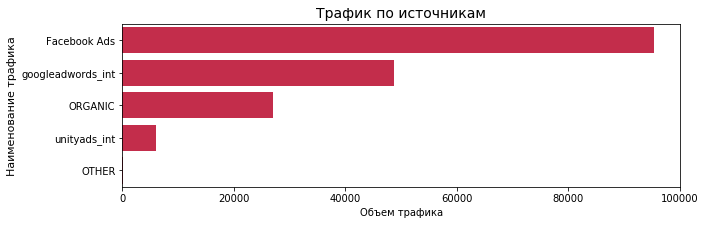

In [22]:
# Гистограмма трафик по странам
source = (users['source']).value_counts().head()

plt.figure(figsize=(10,3))
sns.barplot(y=source.index,x=source, color='crimson')
plt.xlabel('Объем трафика')
plt.ylabel('Наименование трафика', fontsize=11)
plt.title('Трафик по источникам', fontsize=14)

In [23]:
# Количество стран по трафику
len(pd.unique(users['country']))

220

Text(0.5, 1.0, 'Трафик по странам')

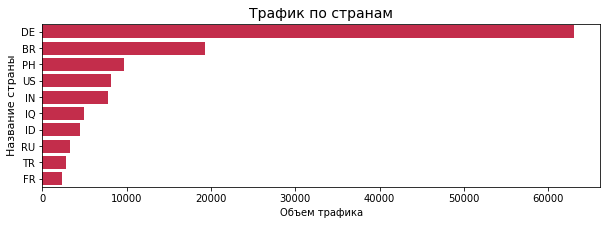

In [24]:
# Гистограмма трафик по странам
country = (users['country']).value_counts().head(10)

plt.figure(figsize=(10,3))
sns.barplot(y=country.index,x=country, color='crimson')
plt.xlabel('Объем трафика')
plt.ylabel('Название страны', fontsize=11)
plt.title('Трафик по странам', fontsize=14)

In [25]:
# Применение метода merge для объединения таблиц
total = pd.merge(
    users,
    pays,
    on=['user_id'], 
    how='left')

total.head(3)

,user_id,reg_date_datetime,source,country,platform,reg_date,organic,coh,pay_date_datetime,pay_amount,pay_date,pay_tipe
0,-4973778100598221234,2021-04-17,Facebook Ads,IQ,ANDROID,1618617600,0,52,NaN,NaN,NaN,NaN
1,5812258986717022745,2021-04-16,googleadwords_int,DE,ANDROID,1618531200,0,53,NaN,NaN,NaN,NaN
2,3641231461578038700,2021-05-29,Facebook Ads,US,ANDROID,1622246400,0,10,2021-05-29,9.99,1.622246e+09,1.0


In [26]:
# Сводная таблица платежей по 'source', 'country'
pd.pivot_table(total,
               index=['source', 'country'],
               values=['pay_amount'], aggfunc = 'sum', margins=True).sort_values(by='pay_amount', ascending=False).head(4)

,,pay_amount
source,country,
All,,90647.02
Facebook Ads,US,15762.79
googleadwords_int,US,7958.73
ORGANIC,SG,7921.06


Топ3 крупных источников трафика:
<br>a. Страна - US, источник - Facebook Ads 
<br>b. Страна - US, источник - googleadwords_int 
<br>c. Страна - SG, источник - ORGANIC

2.Так как история всего 60 дней, а нам нужно понять какой LTV будет на 180 день, нужно спрогнозировать общий LTV по клиенту на 180 день, нужно прикинуть, каким образом эти платежи будут накапливаться далее.

In [27]:
# Сводная таблица с количеством регистраций новых пользователей
pd.pivot_table(total,
               index=['reg_date_datetime'],
             
               values=['pay_amount'], aggfunc = 'count').sort_values(by='reg_date_datetime', ascending=True).head()

,pay_amount
reg_date_datetime,
2021-04-01,76
2021-04-02,51
2021-04-03,79
2021-04-04,154
2021-04-05,147


In [28]:
# LTV в среднем за анализируемый период (оценка)
ltv_all = pd.pivot_table(total,
                       index=['reg_date_datetime'],
                       columns=['pay_date_datetime'],
                       values=['pay_amount'],
                       aggfunc={'pay_amount': [np.mean]},
                       fill_value=0).astype('int')
pd.set_option("display.max_columns",140)

ltv_all

pay_amount                                              \
                        mean                                               
pay_date_datetime 2021-04-01 2021-04-02 2021-04-03 2021-04-04 2021-04-05   
reg_date_datetime                                                          
2021-04-01                35         12         18         12          7   
2021-04-02                 0         12         11         16          3   
2021-04-03                 0          0         13          7         14   
2021-04-04                 0          0          0         11         14   
2021-04-05                 0          0          0          0          7   
...                      ...        ...        ...        ...        ...   
2021-06-04                 0          0          0          0          0   
2021-06-05                 0          0          0          0          0   
2021-06-06                 0          0          0          0          0   
2021-06-07                 0          0          0          0          0   
2021-06-08                 0          0          0          0          0   

                                                                          \
                                                                           
pay_date_datetime 2021-04-06 2021-04-07 2021-04-08 2021-04-09 2021-04-10   
reg_date_datetime                                                          
2021-04-01                 6          2          2          0          6   
2021-04-02                 5          2          4          3          9   
2021-04-03                10         26         18          7         19   
2021-04-04                24         27         15         47          8   
2021-04-05                12         21         35         32         36   
...                      ...        ...        ...        ...        ...   
2021-06-04                 0          0          0          0          0   
2021-06-05                 0          0          0          0          0   
2021-06-06                 0          0          0          0          0   
2021-06-07                 0          0          0          0          0   
2021-06-08                 0          0          0          0          0   

                                                                          \
                                                                           
pay_date_datetime 2021-04-11 2021-04-12 2021-04-13 2021-04-14 2021-04-15   
reg_date_datetime                                                          
2021-04-01                 5          0          7          3         12   
2021-04-02                 8          0          5          6         11   
2021-04-03                11          6          3          0          0   
2021-04-04                41         22         29         29         25   
2021-04-05                41         58         30         51         56   
...                      ...        ...        ...        ...        ...   
2021-06-04                 0          0          0          0          0   
2021-06-05                 0          0          0          0          0   
2021-06-06                 0          0          0          0          0   
2021-06-07                 0          0          0          0          0   
2021-06-08                 0          0          0          0          0   

                                                                          \
                                                                           
pay_date_datetime 2021-04-16 2021-04-17 2021-04-18 2021-04-19 2021-04-20   
reg_date_datetime                                                          
2021-04-01                 0          7          3          5          0   
2021-04-02                12          1          5          1          0   
2021-04-03                 0         26          5          5          7   
2021-04-04                19         15         25         10  

3.Посмотреть источники трафика + страны и попробовать построить LTV (пункт 1 и пункт 2, то есть оценка и прогноз на 180 день) по самым крупным источникам трафика отдельно, выбрать 3 источника + страну. 

Пример:
a. Страна - DE, источник - ORGANIC
b. Страна - BR, источник - Facebook Ads
c. Страна - US, источник - googleadwords_int

In [30]:
# LTV в среднем за анализируемый период (оценка по источник/ страна)
ltv_source = pd.pivot_table(total,
                       index=['source', 'country'],
                       columns=['pay_date_datetime'],
                       values=['pay_amount'],
                       aggfunc={'pay_amount': [np.mean]},
                       fill_value=0).astype('int')
pd.set_option("display.max_columns",140)

ltv_source

pay_amount                                   \
                                mean                                    
pay_date_datetime         2021-04-01 2021-04-02 2021-04-03 2021-04-04   
source            country                                               
Facebook Ads      AE               0          0          0          0   
                  AG               0          0          0          0   
                  AT               0          0          0          0   
                  AU               0          0          2          9   
                  BE               0          0          0          0   
...                              ...        ...        ...        ...   
googleadwords_int QA               0          0          0          0   
                  RS               0          0          0          0   
                  ZM               0          0          0          0   
unityads_int      DE               0          0          0          0   
                  US               0          0          6         14   

                                                                       \
                                                                        
pay_date_datetime         2021-04-05 2021-04-06 2021-04-07 2021-04-08   
source            country                                               
Facebook Ads      AE               0          0          0          0   
                  AG               0          0          0          0   
                  AT               0          0          0          0   
                  AU              23         23         15         13   
                  BE               0          0          0          2   
...                              ...        ...        ...        ...   
googleadwords_int QA               0          0          0          0   
                  RS               0          0          0          0   
                  ZM               0          0          0          0   
unityads_int      DE               0          0          0          0   
                  US               5          4          4         36   

                                                                       \
                                                                        
pay_date_datetime         2021-04-09 2021-04-10 2021-04-11 2021-04-12   
source            country                                               
Facebook Ads      AE               0          0          0          0   
                  AG               0          0          0          0   
                  AT               2          0          0          0   
                  AU              12         49          0          0   
                  BE               2          0          2          0   
...                              ...        ...        ...        ...   
googleadwords_int QA               0          0          0          0   
                  RS               0          0          0          0   
                  ZM               0          0          0          0   
unityads_int      DE               0          0          0          0   
                  US               0         14        116          9   

                                                                       \
                                                                        
pay_date_datetime         2021-04-13 2021-04-14 2021-04-15 2021-04-16   
source            country                                               
Facebook Ads      AE               0          0          0          0   
                  AG               0          0          0          0   
                  AT               0          0          2          0   
                  AU               2          2          0         36   
                  BE               0          0          0          2   
...                              ...        ...        ...        ...   
googlead

##### Вывод:
Проанализированы источники трафика и страны. Выведены средние платежи в разбивке по источникам трафика, странам.

##### Комментарий: 
<br> Оценка платежей выведена; прогноз LTV на 6 месяцев возможно было бы рассчитать линейной регрессией по данным среднего факта за минусом погрешности 5% наиболее больших и малых значений при общем количестве пользователей 1915.